## Understanding Decision Trees in Detail using IRIS dataset (and how to make it better?🤔)

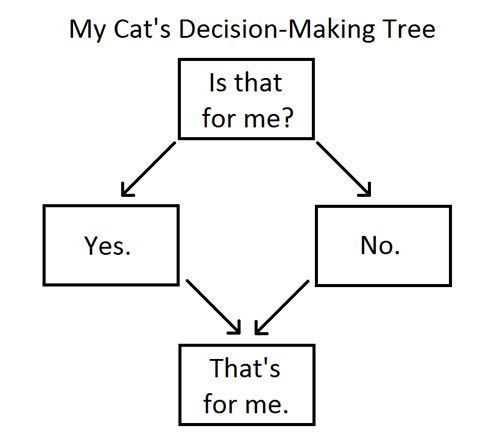

For my final submission, I have decided to move forward with option 1 from the given options and decided to work on explaining decision trees using the freely available IRIS dataset from the UCI Machine Learning Repository (https://archive.ics.uci.edu/dataset/53/iris)! For presenting the same in a public-facing educatinal material, I've decided to delve deeper into Decision Trees and their extension (Random Forest) by writing a blog post.

## Blog post link: https://medium.com/@pgandhi1/dinner-dilemmas-a-tasty-tour-through-decision-trees-and-random-forests-3ca2c4583730

**Dataset Overview**


The Iris Flower Dataset comprises 150 observations, each representing an individual iris flower. It is widely used for classification problems. It includes three different species of the iris flower: ***Setosa, Versicolour, and Virginica***, with 50 samples from each species.

**Feature Set**

Each sample in the dataset is described by four features, which are numerical measurements:
1. Sepal Length: This is the length of the sepal, which is the part of the flower that encases and protects the petals when the flower is in bud stage.
2. Sepal Width: This is the width of the sepal.
3. Petal Length: This refers to the length of the petal, the most colorful and noticeable part of the flower.
4. Petal Width: This is the width of the petal.

These features are measured in centimeters and provide the basis for our classification task. The goal is to use these measurements to correctly classify each iris flower into one of the three species


### So what are Decision Trees?

At their core, Decision Trees function as a series of sequential, hierarchical decisions, much like a flowchart. Each decision, or 'node', in the tree involves assessing a specific attribute of the data. For instance, in analyzing flower characteristics, a node might involve a question like, “Is the petal length greater than a certain value?” Depending on the answer, the algorithm proceeds along one of the branches stemming from that node, leading to another decision or, ultimately, to a 'leaf' representing the final classification or outcome

So, how do we decide on which parameter to split the decision on? Turns out there are many 'algorithms' that helps us decide which on to choose, we will look into this the further we go.

### Step 1. Setting up Dataset and importing libraries

In [1]:
import pandas as pd
import numpy as np

from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
iris = datasets.load_iris()
X = iris.data
y = iris.target

iris_df = pd.DataFrame(X, columns=iris.feature_names)
iris_df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)

In [3]:
iris_df.sample(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
88,5.6,3.0,4.1,1.3,versicolor
135,7.7,3.0,6.1,2.3,virginica
65,6.7,3.1,4.4,1.4,versicolor
27,5.2,3.5,1.5,0.2,setosa
140,6.7,3.1,5.6,2.4,virginica
92,5.8,2.6,4.0,1.2,versicolor
118,7.7,2.6,6.9,2.3,virginica
23,5.1,3.3,1.7,0.5,setosa
55,5.7,2.8,4.5,1.3,versicolor
83,6.0,2.7,5.1,1.6,versicolor


###  Step 2. Doing some Exploratory Data Analysis

In [4]:
iris_df.shape

(150, 5)

In [5]:
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   sepal length (cm)  150 non-null    float64 
 1   sepal width (cm)   150 non-null    float64 
 2   petal length (cm)  150 non-null    float64 
 3   petal width (cm)   150 non-null    float64 
 4   species            150 non-null    category
dtypes: category(1), float64(4)
memory usage: 5.1 KB


In [7]:
# displaying how many distinct value does each species have 
iris_df["species"].value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

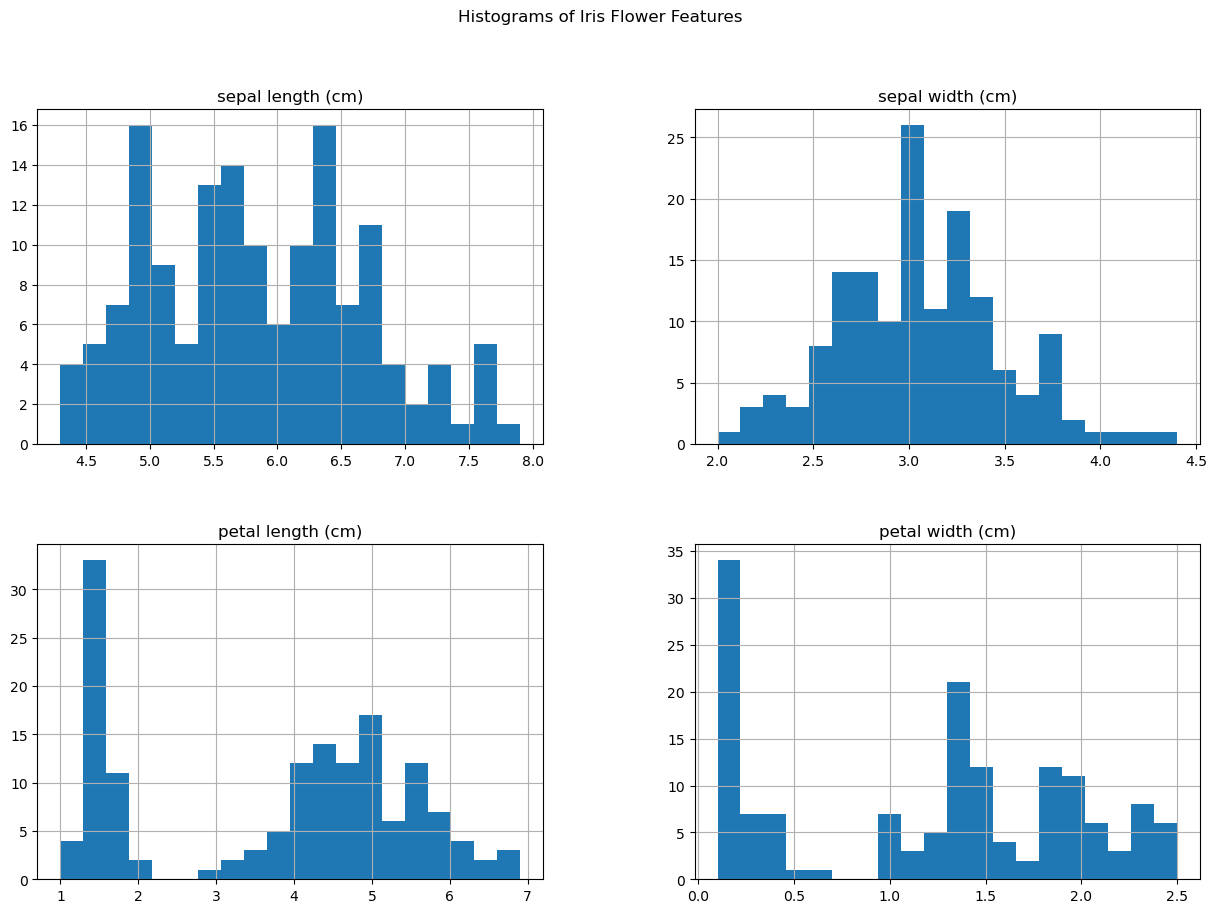

In [8]:
# how are each of the features distributed??
iris_df.hist(bins=20, figsize=(15,10))
plt.suptitle("Histograms of Iris Flower Features")
plt.show()

Checking for any outliers using Boxplot

In [9]:
iris_df.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'species'],
      dtype='object')

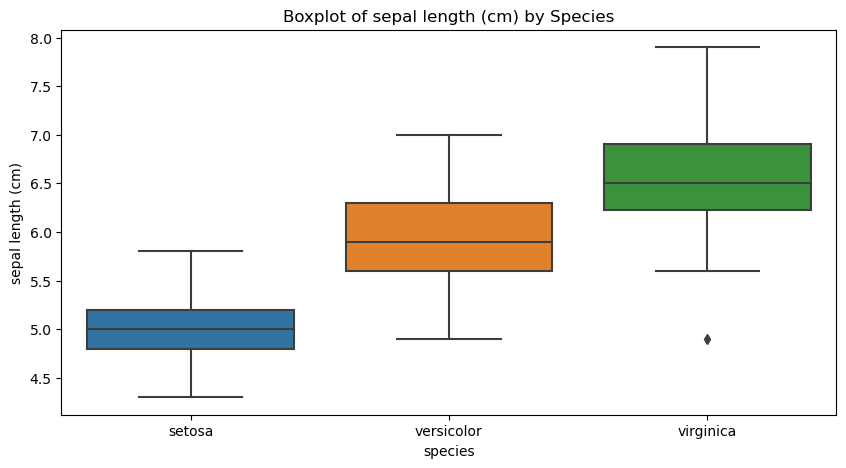

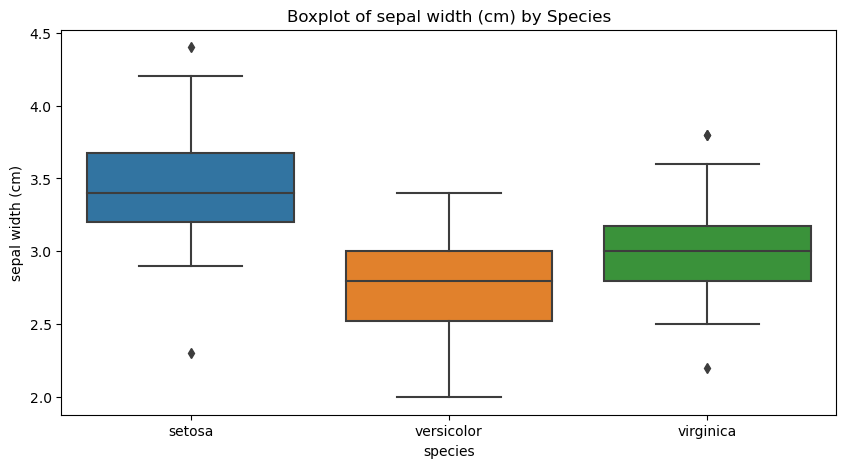

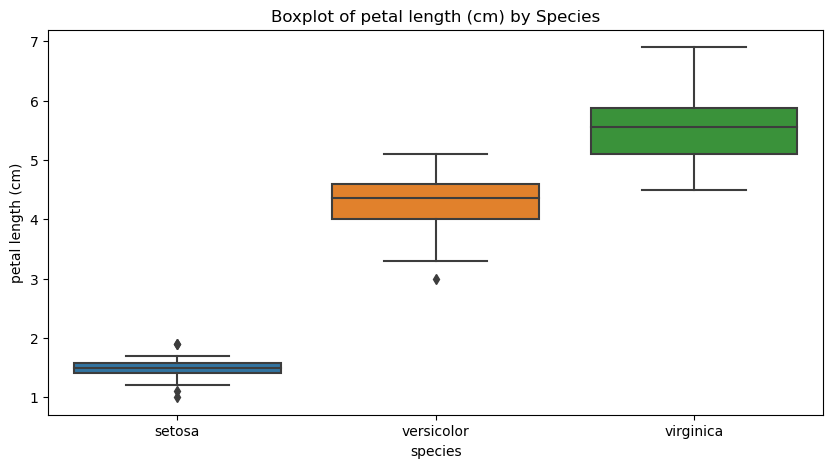

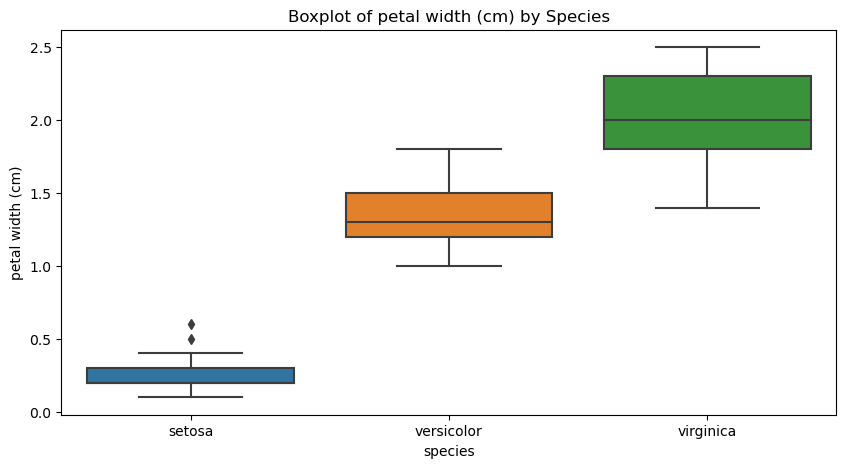

In [10]:
features = iris_df.columns[:-1]  # Excluding the species column
for feature in features:
    plt.figure(figsize=(10, 5))
    sns.boxplot(x='species', y=feature, data=iris_df)
    plt.title(f'Boxplot of {feature} by Species')
    plt.show()

#### From above, we can say that there are rarely any outlies that may affect us, so we will continue with the EDA, lets plot a pairwise scatter plot as well as a correlation graph to find out whether there is any -ve or +ve correaltion between any of the features

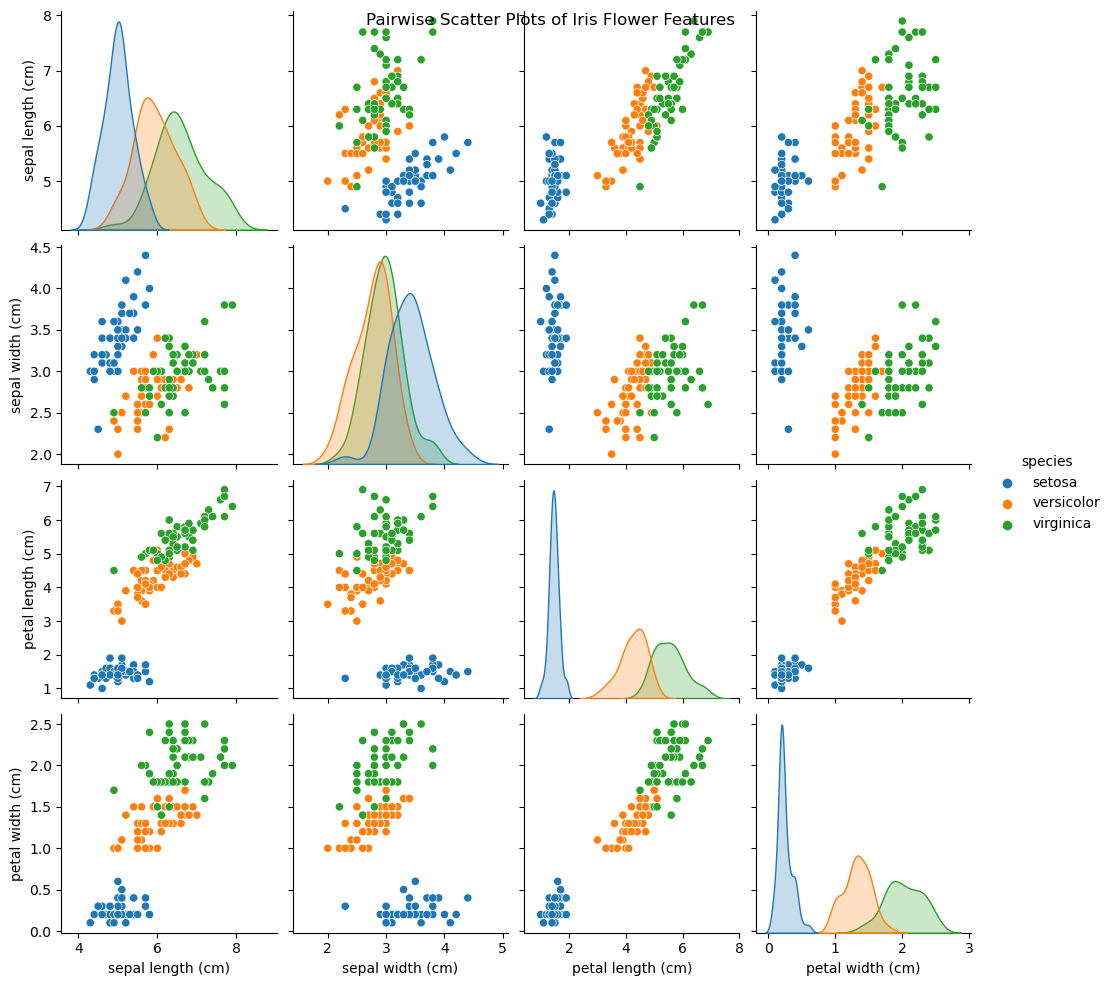

In [11]:
sns.pairplot(iris_df, hue='species')
plt.suptitle("Pairwise Scatter Plots of Iris Flower Features")
plt.show()

/var/folders/qg/zknj8z4j47b2wr38lyvvhwh80000gn/T/ipykernel_24931/2503079796.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(iris_df.corr(), annot=True)


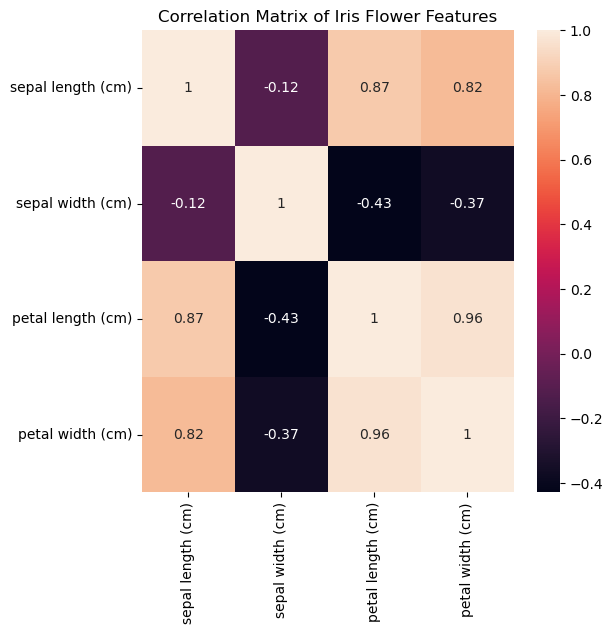

In [14]:
plt.figure(figsize=(6,6))
sns.heatmap(iris_df.corr(), annot=True)
plt.title("Correlation Matrix of Iris Flower Features")
plt.show()

From above, we can see that sepal length and petal length have a very high correlation (0.87) as well as sepal length and petal width have high correlation

### Step 3 Preprocessing for training!

In [86]:
# we first split the data, its a small dataset so we will do a 70-30 split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state= 22)

In [87]:
print( X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(105, 4) (45, 4) (105,) (45,)


In [88]:
# now we train the Decision Tree Classifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)

DecisionTreeClassifier()

In [89]:
dtree_predictions = dtree.predict(X_test)
print("Decision Tree Classifier Confusion Matrix:\n", confusion_matrix(y_test, dtree_predictions))

print("\nDecision Tree Classifier Classification Report:\n", classification_report(y_test, dtree_predictions))


Decision Tree Classifier Confusion Matrix:
 [[13  0  0]
 [ 0 15  1]
 [ 0  4 12]]

Decision Tree Classifier Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.79      0.94      0.86        16
           2       0.92      0.75      0.83        16

    accuracy                           0.89        45
   macro avg       0.90      0.90      0.89        45
weighted avg       0.90      0.89      0.89        45



We achieved accuracy of ***89%!***. While that is great, we'd like to make the model more accurate. I talked about how there are, as well as Professor, you also taught us in class about the different criterions that exist in generating a classifier. By default the DecisionTrmeeClassifier uses the 'Gini' criterion. These criterions are nothing but just a way to select what nodes to choose to get an optimum split.

There mainly exists 2 methods, namely Gini indexin and Entropy (Information Gain)

Gini Impurity: This measures how often a randomly chosen element from the set would be incorrectly labeled if it was randomly labeled according to the distribution of labels in the subset. A Gini Impurity of 0 indicates that all elements in the subset belong to the same class. The decision tree algorithm will use this measure to split nodes in a way that minimizes the impurity in the two child nodes.

Entropy: Entropy is a measure from information theory, building upon the concept of information content. It calculates the impurity based on the information gain — how much information a decision provides about the class. A higher information gain implies a more homogeneous set. The decision tree will try to maximize the information gain when splitting nodes.

Both Gini Impurity and Entropy lead to similar trees, as we will see, but Gini is often faster to compute

In [93]:
from sklearn.metrics import accuracy_score
criteria = ['gini', 'entropy']

results = pd.DataFrame(columns=['Criterion', 'Accuracy'])

for criterion in criteria:
    dtree = DecisionTreeClassifier(criterion=criterion, random_state=22)
    dtree.fit(X_train, y_train)
    predictions = dtree.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    results = results.append({'Criterion': criterion, 'Accuracy': accuracy}, ignore_index=True)

print(results)

  Criterion  Accuracy
0      gini  0.933333
1   entropy  0.933333


/var/folders/qg/zknj8z4j47b2wr38lyvvhwh80000gn/T/ipykernel_24931/1752957780.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'Criterion': criterion, 'Accuracy': accuracy}, ignore_index=True)
/var/folders/qg/zknj8z4j47b2wr38lyvvhwh80000gn/T/ipykernel_24931/1752957780.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'Criterion': criterion, 'Accuracy': accuracy}, ignore_index=True)


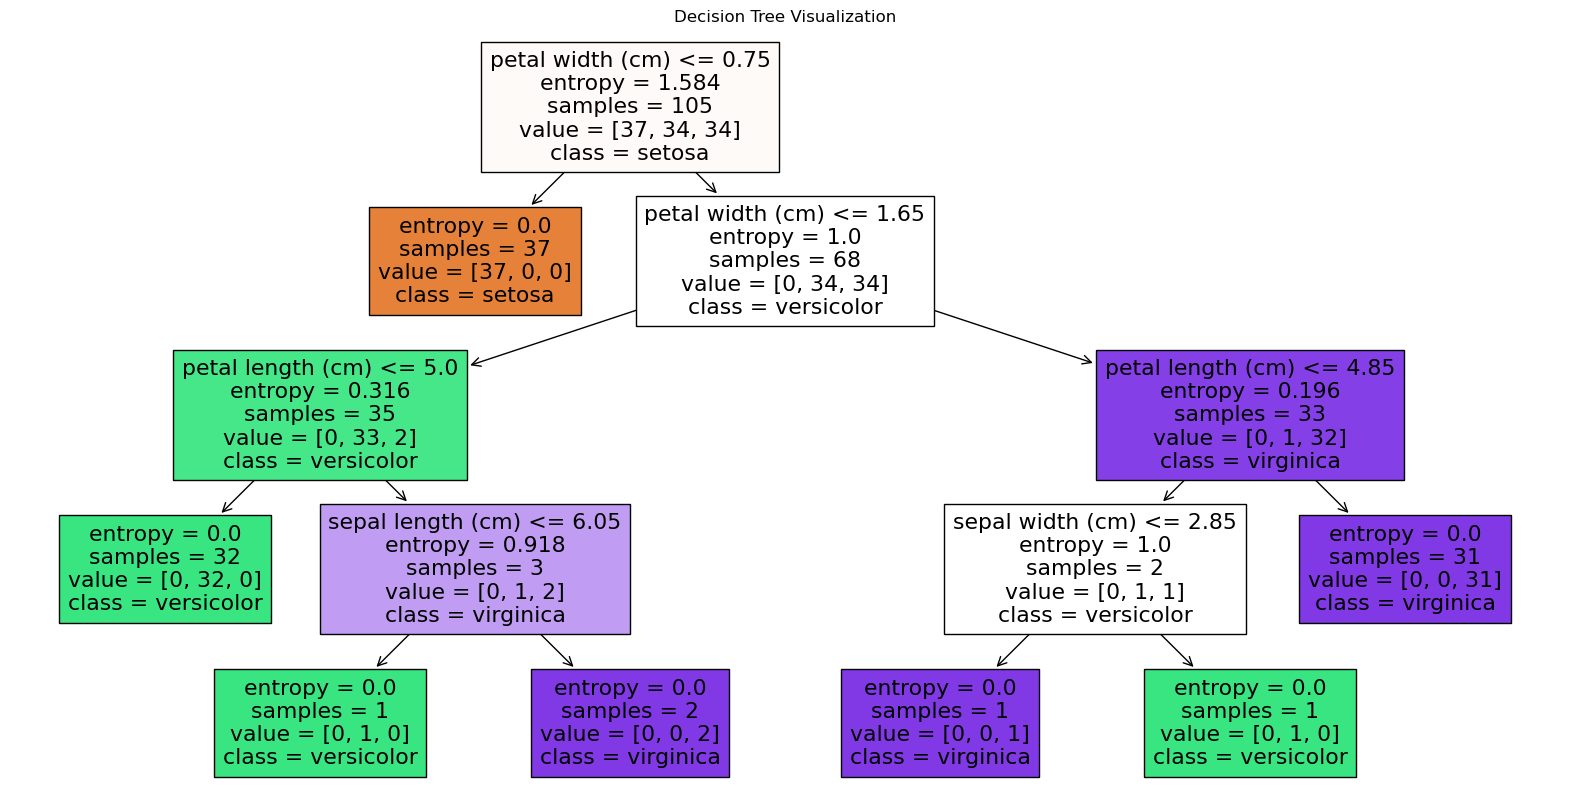

In [96]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20,10))
plot_tree(dtree, filled=True, feature_names=iris.feature_names, class_names=list(iris.target_names))
plt.title("Decision Tree Visualization")
plt.show()


While the Decision Tree model achieved 0.93 accuracy on the this dataset, this approach has its drawbacks. Apart from the tendency to overfit, which means it might not perform as well on new, unseen data, decision trees can also be sensitive to slight variations in the training data, potentially leading to different decision paths. Decision trees are also prone to errors if a problem has mutiple classes and a relatively small no. of training data


To address these issues, we can look towards an ensemble method like Random Forest.

##  So what is Random Forest?

It is a ensemble method (meaning basically a technique that combines results from mutiple methods to improve final answer).


We covered this technique *briefly* in class but I always wondered how would it perform as compared to regular DT. So I chose to move forward with this!

This technique is very useful to improve upon the accuracy and overcoming some of the shortcomings of single decision trees. Random Forest operates by constructing a multitude of decision trees during training and outputting the class that is the mode of the classes (classification) of the individual trees. 

Essentially, it creates a *'forest'* of trees where each tree is trained on a random subset of the data and features, and their collective decisions contribute to the final prediction. 

This kind of collective decision making is achieved through a process known as "bagging" or bootstrap aggregating, where numerous decision trees are constructed, each trained on a random sample of the training data.

Now let's train one with the default parameters for now

In [107]:
rf_classifier = RandomForestClassifier(random_state = 10)

rf_classifier.fit(X_train, y_train)

rf_predictions = rf_classifier.predict(X_test)

rf_accuracy = accuracy_score(y_test, rf_predictions)
print(f"Accuracy of Random Forest Classifier: {rf_accuracy:.2f}")

Accuracy of Random Forest Classifier: 0.93


#### Even with using the default parameters, we achieved a bump of **4%** to the accuracy. Now can we improve the accuracy furthur?

By looking at the hyperparameters of the class on scikit https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html, I can see that the `n_estimators` is set to 100. Now since we are working with a small dataset of 150 samples, I tought of decreasing the `n_estimators` to 50 from 100 (which is default) and see whats the accuracy like!

In [110]:
rf_classifier = RandomForestClassifier(n_estimators = 50, random_state = 10)

rf_classifier.fit(X_train, y_train)

rf_predictions = rf_classifier.predict(X_test)

rf_accuracy = accuracy_score(y_test, rf_predictions)
print(f"Accuracy of Random Forest Classifier: {rf_accuracy:.2f}")

Accuracy of Random Forest Classifier: 0.96


### As you can see , we achieved a bump of **7%** to the accuracy as compared to Decision Tree and a 3% bump when comparing it against the default parameterised Random Forest Classifier!

Lets plot the Confusion Matrix and a detailed classification report

<Axes: >

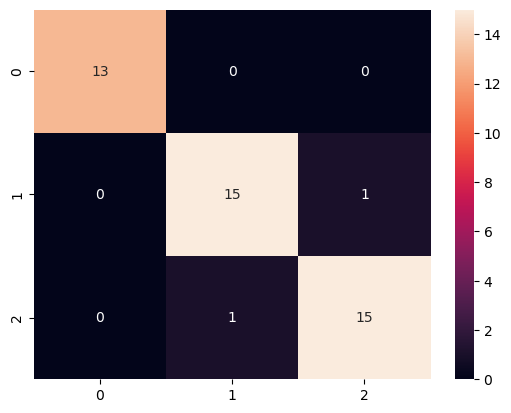

In [111]:
sns.heatmap(confusion_matrix(y_test, rf_predictions), annot=True)

In [112]:
print(classification_report(y_test, rf_predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.94      0.94      0.94        16
           2       0.94      0.94      0.94        16

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



Since there are a lot of trees in RF, I'll just visualise the top 5 trees

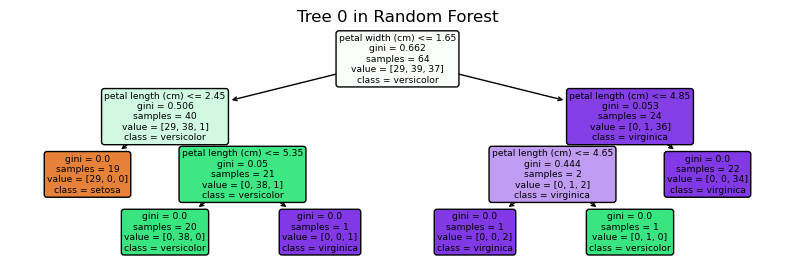

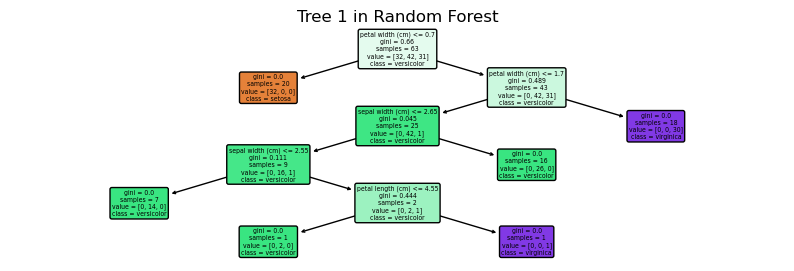

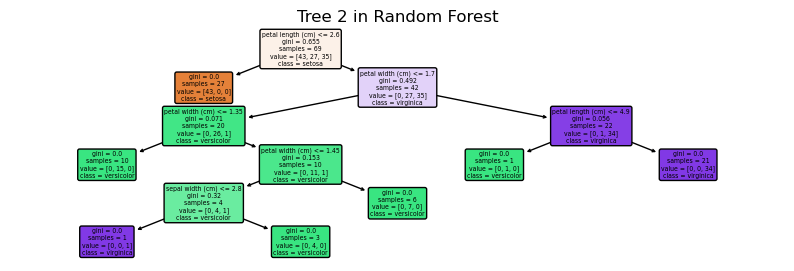

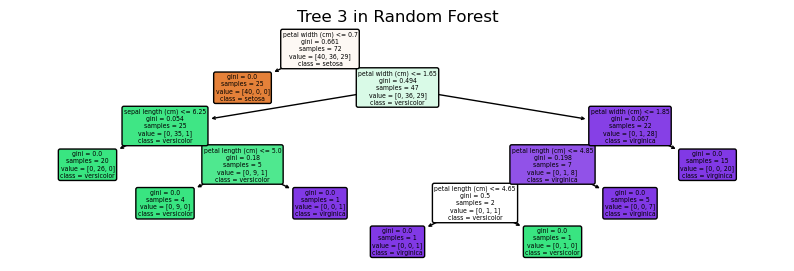

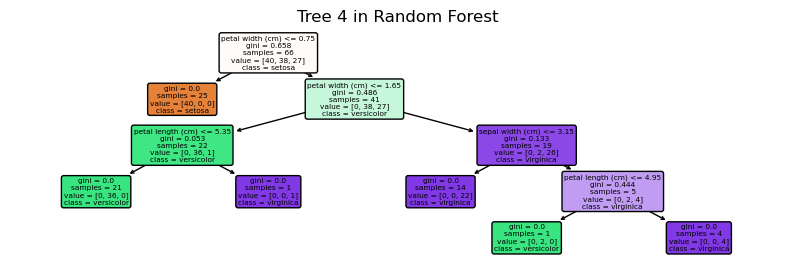

In [114]:
n_trees_to_visualize = 5
for i in range(n_trees_to_visualize):
    single_tree = rf_classifier.estimators_[i]
    plt.figure(figsize=(10, 3))
    plot_tree(single_tree, filled=True, feature_names=iris.feature_names, class_names=list(iris.target_names), rounded=True)
    plt.title(f"Tree {i} in Random Forest")
    plt.show()

So this was my work for the final submission. I worked upon the concept of Decision Tree, from concepts taught in lectures, through assignments as well as as my own research. I also took motivation from lecture slides to discover more about Random Forest as well.

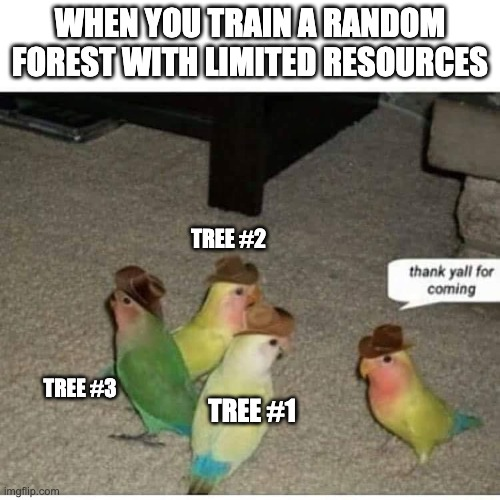